# Feature Scaling - Normalixation
## at the end understaning all the concept

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']

In [9]:
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


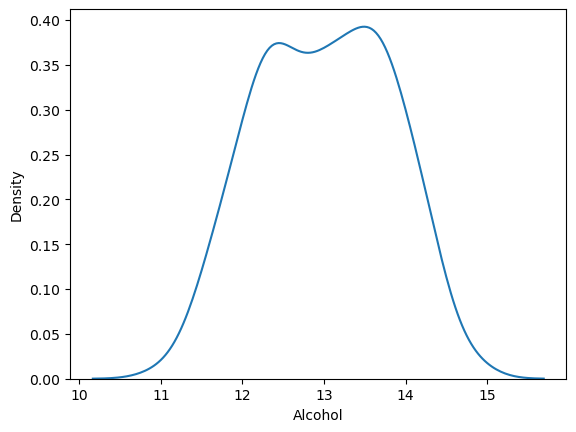

In [29]:
sns.kdeplot(df['Alcohol'])
df = df.dropna()

<Axes: xlabel='Malic acid', ylabel='Density'>

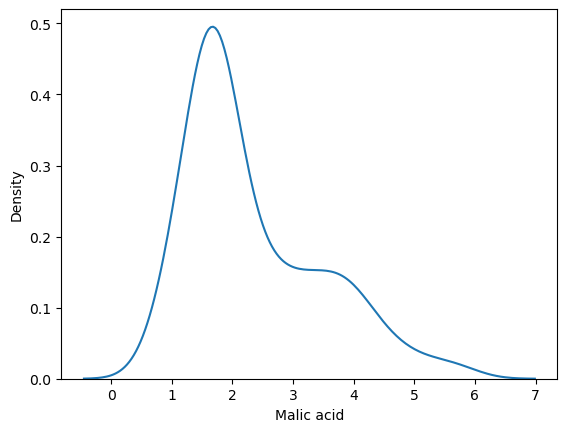

In [15]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

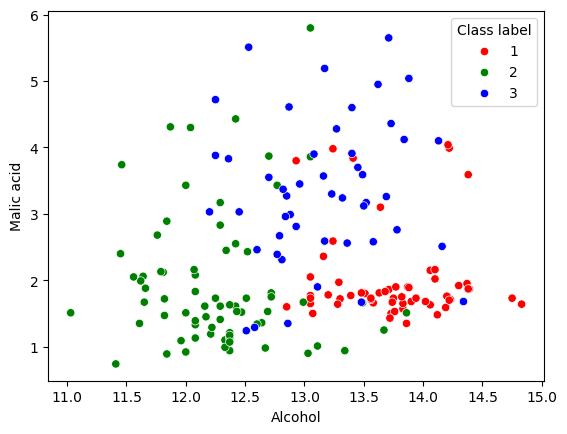

In [33]:
color_dict = {1:'red',2:'green',3:'blue'}
sns.scatterplot(x=df['Alcohol'], y=df['Malic acid'], hue=df['Class label'], palette=color_dict)

## Always Remember whever we do scalling we alwyas have to do train test Spliting

In [42]:
from sklearn.model_selection import train_test_split
x_train,y_train,x_test,y_test = train_test_split(df.drop('Class label', axis=1),
                                                 df['Class label'],
                                                 test_size = 0.3,
                                                 random_state=0
                                                )
x_train.shape,y_train.shape

((124, 2), (54, 2))

In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#fir the scaler to train set it will learn the parameters
scaler.fit(x_train)


x_train_scaled = scaler.transform(x_train)
y_train_scaled = scaler.transform(y_train)

y_train_scaled

array([[ 0.72849462,  0.16386555],
       [ 0.47311828,  0.37394958],
       [ 0.36021505,  0.05042017],
       [ 0.68010753,  0.17647059],
       [ 0.54301075,  1.03151261],
       [ 0.14247312,  0.24369748],
       [ 0.81451613,  0.26470588],
       [ 0.35752688,  0.61764706],
       [ 0.32795699,  0.17647059],
       [ 0.28225806,  0.19747899],
       [ 0.62634409,  0.35084034],
       [ 0.76612903,  0.87184874],
       [ 0.85215054,  0.18277311],
       [ 0.36021505,  0.03781513],
       [ 0.68548387,  0.35504202],
       [ 0.26075269,  0.00630252],
       [ 0.73387097,  0.13445378],
       [ 0.84946237,  0.14705882],
       [ 0.4327957 ,  0.0987395 ],
       [ 0.75268817,  0.15966387],
       [ 0.55913978,  0.02521008],
       [ 0.54301075,  0.15966387],
       [ 0.59408602,  0.35714286],
       [ 0.39784946,  0.17647059],
       [ 0.34946237,  0.04411765],
       [ 0.40053763,  0.32352941],
       [ 0.37634409,  0.13445378],
       [ 0.30376344,  0.1512605 ],
       [ 0.19623656,

### now the output is in form of array lets convert it into dataframe

In [51]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
y_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)

## what it was

In [55]:
np.round(x_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


## what we Created

In [59]:
np.round(x_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


* min == 0
* max == 0

## is There any differnce ? see the Below Graphs

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not      Alcohol  Malic acid
54     13.74        1.67
151    12.79        2.67
63     12.37        1.13
55     13.56        1.73
123    13.05        5.80
121    11.56        2.05
7      14.06        2.15
160    12.36        3.83
106    12.25        1.73
90     12.08        1.83
141    13.36        2.56
146    13.88        5.04
5      14.20        1.76
98     12.37        1.07
168    13.58        2.58
80     12.00        0.92
33     13.76        1.53
18     14.19        1.59
61     12.64        1.36
51     13.83        1.65
66     13.11        1.01
37     13.05        1.65
4      13.24        2.59
104    12.51        1.73
60     12.33        1.10
111    12.52        2.43
126    12.43        1.53
86     12.16        1.61
112    11.76        2.68
164    13.78        2.76
26     13.39        1.77
56     14.22        1.70
129    12.04        4.30
45     14.21        4.04
8      14.83        1.64
44     13.05        1.77
161    13.69        3.26
92     12.69        1.53
94     11.62        1.99
174    13.40        3.91
24     13.50        1.81
30     13.73        1.50
93     12.29        2.83
101    12.60        1.34
113    11.41        0.74
19     13.64        3.10
135    12.60        2.46
74     11.96        1.09
144    12.25        3.88
16     14.30        1.92
131    12.88        2.99
138    13.49        3.59
40     13.56        1.71
158    14.34        1.68

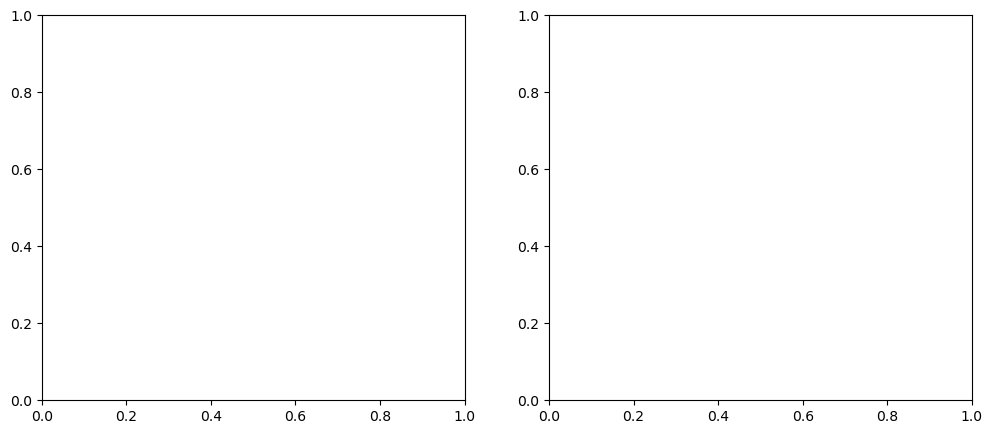

In [69]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Scatter plot before scaling
ax1.scatter(x=x_train['Alcohol'], y=x_train['Malic acid'], c=y_train, cmap='viridis')
ax1.set_title("Before Scaling")
ax1.set_xlabel("Alcohol")
ax1.set_ylabel("Malic Acid")

# Scatter plot after scaling
ax2.scatter(x=x_train_scaled['Alcohol'], y=x_train_scaled['Malic acid'], c=y_train, cmap='viridis')
ax2.set_title("After Scaling")
ax2.set_xlabel("Alcohol")
ax2.set_ylabel("Malic Acid")

plt.show()


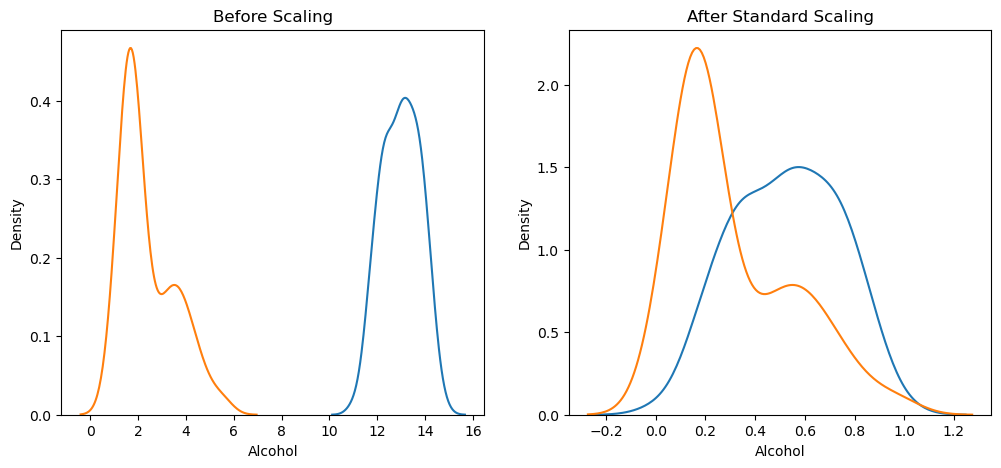

In [71]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Alcohol'], ax=ax1)
sns.kdeplot(x_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(x_train_scaled['Malic acid'], ax=ax2)
plt.show()

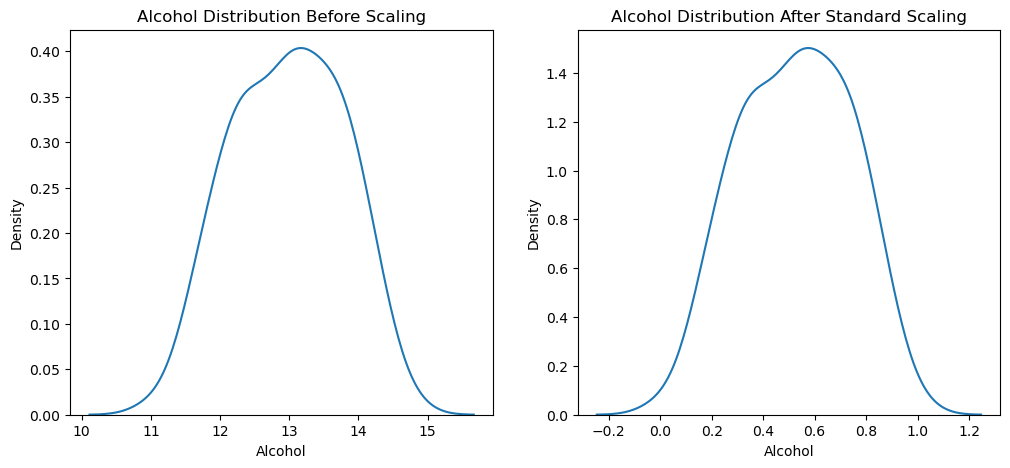

In [73]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(x_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['Alcohol'], ax=ax2)
plt.show()

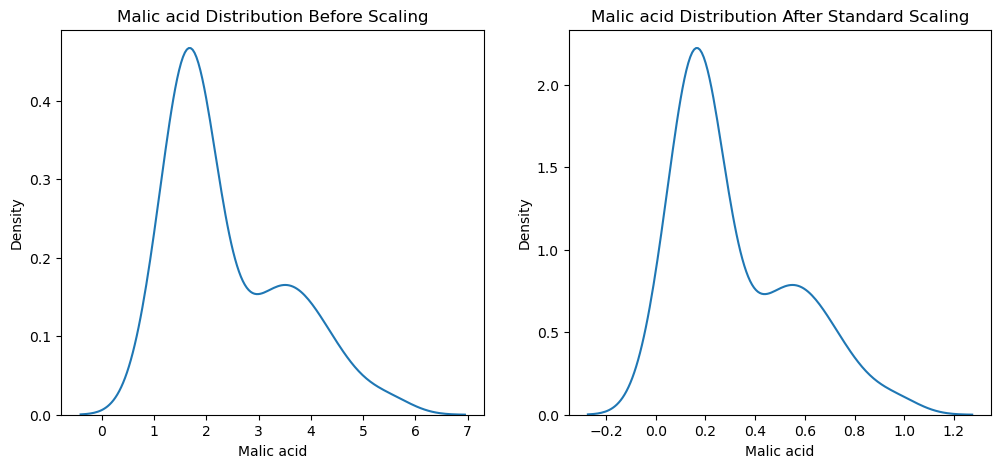

In [75]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(x_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['Malic acid'], ax=ax2)
plt.show()

# Trying Self
## MaxAbsScaler
## Mean Normalization
## Robust Scaling

In [91]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
scaler.fit(x_train)

x_train_maxscale = scaler.transform(x_train)
y_train_maxscale = scaler.transform(y_train)

# x_train_maxscale

In [97]:
x_train_maxscale = pd.DataFrame(x_train_maxscale, columns=x_train.columns)
y_train_maxscale = pd.DataFrame(x_train_maxscale, columns=x_train.columns)
